# Exercise 1: Task 3

## (a) Data Loading and preprocessing

In [1]:
import pandas as pd
import re #regluar expression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into memory with the 'ISO-8859-1' encoding
# since utf-8 returns UnicodeDecodeError
path = "Corona_NLP_train.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')

# Extract and concatenate all tweets
all_tweets = df["OriginalTweet"].str.cat(sep='')

# Convert characters to lowercase
lower_tweets = all_tweets.lower()

tweets = ""
# Iterate through each characters in string and keep it if it is alphanumeric
# (alphabets or numbers)
for char in lower_tweets:
    if char.isalnum():
        tweets += char
    elif char.isspace():
        tweets += '_'

# Print the first 1000 characters of the 'tweets' string
print(tweets[:1000])

menyrbie_philgahan_chrisitv_httpstcoifz9fan2pa_and_httpstcoxx6ghgfzcc_and_httpstcoi2nlzdxno8advice_talk_to_your_neighbours_family_to_exchange_phone_numbers_create_contact_list_with_phone_numbers_of_neighbours_schools_employer_chemist_gp_set_up_online_shopping_accounts_if_poss_adequate_supplies_of_regular_meds_but_not_over_ordercoronavirus_australia_woolworths_to_give_elderly_disabled_dedicated_shopping_hours_amid_covid19_outbreak_httpstcobinca9vp8pmy_food_stock_is_not_the_only_one_which_is_empty______please_dont_panic_there_will_be_enough_food_for_everyone_if_you_do_not_take_more_than_you_need____stay_calm_stay_safe______covid19france_covid19_covid19_coronavirus_confinement_confinementotal_confinementgeneral_httpstcozrlg0z520jme_ready_to_go_at_supermarket_during_the_covid19_outbreak______not_because_im_paranoid_but_because_my_food_stock_is_litteraly_empty_the_coronavirus_is_a_serious_thing_but_please_dont_panic_it_causes_shortage______coronavirusfrance_restezchezvous_stayathome_confine

In [3]:
# Get unique characters in tweets
chars = list(set(list(tweets)))
chars.sort()

# Summary
print(f'Number of unique characters in tweets: {len(chars)}')
print(chars)

Number of unique characters in tweets: 45
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '²', '³', '¹', 'º', '¼', '½', 'â', 'ã']


In [4]:
# Define list of valid characters
valid_chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
               'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
               '_']

# View valid characters
print(f'Number of invalid characters: {len(valid_chars)}')
print(valid_chars)

Number of invalid characters: 27
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_']


In [5]:
# Get list of invalid characters, by removing valid characters from all given characters
invalid_chars = [x for x in chars if x not in valid_chars]

# View invalid characters
print(f'Number of invalid characters: {len(invalid_chars)}')
print(invalid_chars)

Number of invalid characters: 18
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '²', '³', '¹', 'º', '¼', '½', 'â', 'ã']


In [6]:
# Remove all invalid characters from tweets
for char in invalid_chars:
    tweets = tweets.replace(char, '')
    
# Repace multiple spacings with singular spacing
tweets = re.sub(r'_+', '_', tweets)

In [7]:
# Take a look at tweets
tweets[:1000]

'menyrbie_philgahan_chrisitv_httpstcoifzfanpa_and_httpstcoxxghgfzcc_and_httpstcoinlzdxnoadvice_talk_to_your_neighbours_family_to_exchange_phone_numbers_create_contact_list_with_phone_numbers_of_neighbours_schools_employer_chemist_gp_set_up_online_shopping_accounts_if_poss_adequate_supplies_of_regular_meds_but_not_over_ordercoronavirus_australia_woolworths_to_give_elderly_disabled_dedicated_shopping_hours_amid_covid_outbreak_httpstcobincavppmy_food_stock_is_not_the_only_one_which_is_empty_please_dont_panic_there_will_be_enough_food_for_everyone_if_you_do_not_take_more_than_you_need_stay_calm_stay_safe_covidfrance_covid_covid_coronavirus_confinement_confinementotal_confinementgeneral_httpstcozrlgzjme_ready_to_go_at_supermarket_during_the_covid_outbreak_not_because_im_paranoid_but_because_my_food_stock_is_litteraly_empty_the_coronavirus_is_a_serious_thing_but_please_dont_panic_it_causes_shortage_coronavirusfrance_restezchezvous_stayathome_confinement_httpstcousmualqnas_news_of_the_regions

## (b) Unigram probabilities

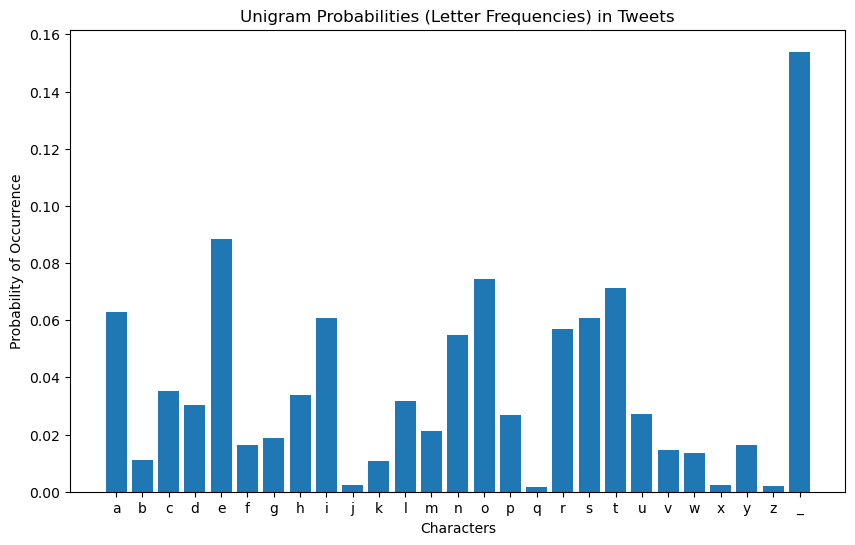

In [8]:
# Define alphabet A
A = valid_chars

# Initialize dictionary to store character counts
character_counts = {char: 0 for char in A}

# Count occurrences of character in "tweets" string
for char in tweets:
    if char in character_counts:
        character_counts[char] += 1

# Calculate total number of characters in tweets
total_characters = len(tweets)

# Calculate probabilities (frequencies) of each character
character_probabilities = {char: count / total_characters for char, count in character_counts.items()}

# Visualize the frequencies in a histogram
plt.figure(figsize=(10, 6))
plt.bar(character_probabilities.keys(), character_probabilities.values())
plt.xlabel("Characters")
plt.ylabel("Probability of Occurrence")
plt.title("Unigram Probabilities (Letter Frequencies) in Tweets")
plt.show()

In [9]:
# Initialize variable to store sum of probabilities
total_sum = 0

# Iterate through dict and add each value to total_sum
for value in character_probabilities.values():
    total_sum += value
    
# Check if probabilities add up to 1
print(f'The sum of all probabilities: {total_sum}')

The sum of all probabilities: 1.0


In [10]:
 # Sort the dictionary by values in ascending order
uni_probs_sorted = dict(sorted(character_probabilities.items(), key=lambda item: item[1], reverse = True))

In [11]:
# Return 5 most frequent characters
list(uni_probs_sorted.items())[:5]

[('_', 0.1539338580620012),
 ('e', 0.08847072557285068),
 ('o', 0.07457828008982316),
 ('t', 0.07122066803378113),
 ('a', 0.06281063322005222)]

The most common character is _ which represents empty spaces. This high probability P(A = \"_\" ) = 0.15 can be expected, since every pair of words is seperated by a space, resulting in a realtively high frequency, compared to all other characters.

Three of the five most common characters are the vowels e, o, a. Their high frequency can also be expected, because every syllable of an english word has to have at least one vowel. Since only 5/26 of all letters are vowels, we can expect that the vowels on average have a higher frequency than consonants. They are also the most frequently used letters in the english language.

We can also observe that the letter t is the 4th most frequent letter in our tweets. This can be expected, because the letter t is the 2nd most used letter in the english language and most frequently used consonant.

source: https://www3.nd.edu/~busiforc/handouts/cryptography/Letter%20Frequencies.html

In [12]:
# Return 5 least frequent characters
list(uni_probs_sorted.items())[-5:]

[('k', 0.010682957653318293),
 ('j', 0.002187132605265395),
 ('x', 0.0021844111627868402),
 ('z', 0.002125446575751481),
 ('q', 0.0016859984117143325)]

The five least frequent characters can also be expected, since they are the 5 least frequent letters in the english language. This is especially evident for the letters z and q, which  have a frequency below 0.01%.
(source: https://www3.nd.edu/~busiforc/handouts/cryptography/Letter%20Frequencies.html)

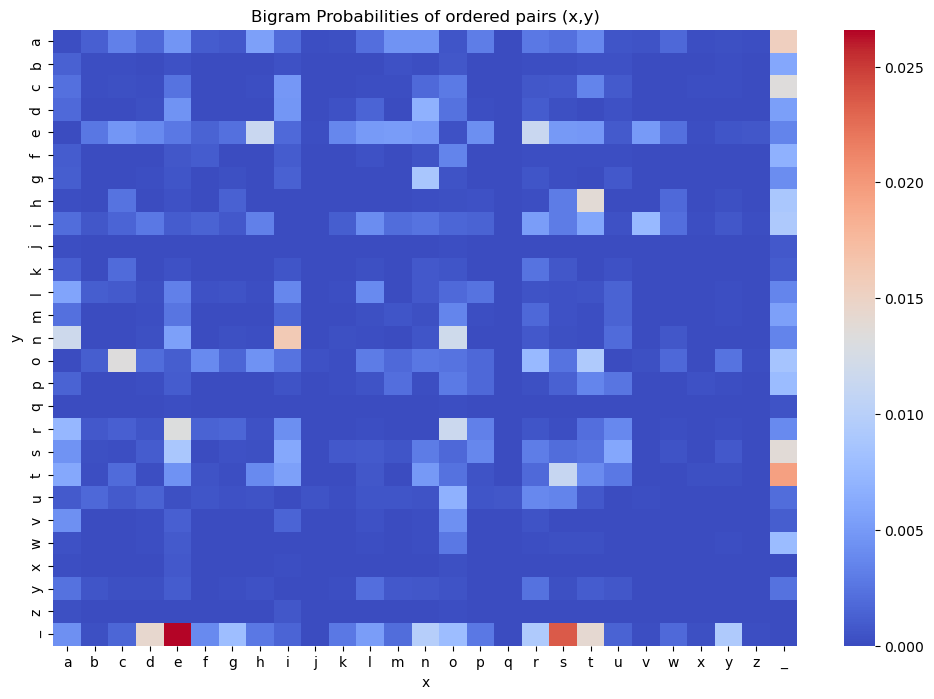

In [13]:
# Initialize dictionary to store counts of each ordered pair (x, y)
bigram_counts = {(x, y): 0 for x in A for y in A}

# Count occurrences of each ordered pair (x, y) in tweets
for i in range(len(tweets) - 1):
    x, y = tweets[i], tweets[i + 1]
    if (x, y) in bigram_counts:
        bigram_counts[(x, y)] += 1

# Calculate total number of ordered pairs
total_ordered_pairs = len(tweets) - 1

# Calculate probabilities (frequencies) of each ordered pair
bigram_probabilities = {(x, y): count / total_ordered_pairs for (x, y), count in bigram_counts.items()}

# Create matrix of probabilities
prob_matrix = [[bigram_probabilities[(x, y)] for x in A] for y in A]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(prob_matrix, xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bigram Probabilities of ordered pairs (x,y)")
plt.show()

In [14]:
# Find 10 most frequent ordered pairs (bigrams)
most_frequent_pairs = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]

# Find 10 least common ordered pairs
least_common_pairs = sorted(bigram_probabilities.items(), key=lambda x: x[1])[:10]

print("10 Most Frequent Ordered Pairs:")
for pair, probability in most_frequent_pairs:
    print(f"{pair}: P = {probability}")

print("\n10 Least Common Ordered Pairs:")
for pair, probability in least_common_pairs:
    print(f"{pair}: P = {probability}")

10 Most Frequent Ordered Pairs:
('e', '_'): P = 0.02658784849857351
('s', '_'): P = 0.02356264081036792
('_', 't'): P = 0.0194939541851579
('i', 'n'): P = 0.01609500168146289
('_', 'a'): P = 0.015399737834340592
('d', '_'): P = 0.01434420679336927
('t', '_'): P = 0.0141547425353091
('t', 'h'): P = 0.013841387832169916
('_', 's'): P = 0.01378592223541906
('_', 'c'): P = 0.013419823378360254

10 Least Common Ordered Pairs:
('_', '_'): P = 0.0
('_', 'x'): P = 3.0324648690888802e-05
('q', 'z'): P = 3.1361388817073034e-05
('f', 'z'): P = 3.2009351395938184e-05
('q', 'q'): P = 3.2398128943257266e-05
('b', 'x'): P = 3.3175684037895445e-05
('p', 'z'): P = 3.3175684037895445e-05
('s', 'x'): P = 3.3305276553668475e-05
('y', 'x'): P = 3.34348690694415e-05
('b', 'q'): P = 3.382364661676059e-05


It should be noted that we now have 27x27 items and not only 27 items which makes exhaustive reasoning more difficult. As can be seen, there are many very rare pairs, some common ("white spots") pairs and very few really common pairs ("hot spots").

The most frequent pairs are expeceted as the english language has many words that end with and "e" and as many plurals end on "s". The other pairs are also very common in the english language ('t', 'h'): ("the", "therapy", "path",...), ('i', 'n'), ('i', 'o'): ("intervention", "infection") 

The Least Common pairs are are also expected. There are not many words start with "x", however there are very many character pairs that are rare in the english language, e.g.: ('q', 'q'), ('x','x) which aren't even in the bottom 10.

The only ordered pair that does not appear is ('_', '_'), which makes sense, because it was a desired part of the preprocessing. Every other pair has a frequency > 0.

Furthermore we observe that for very rare combinations we get very similar frequencies.

# d) Conditional probabilities

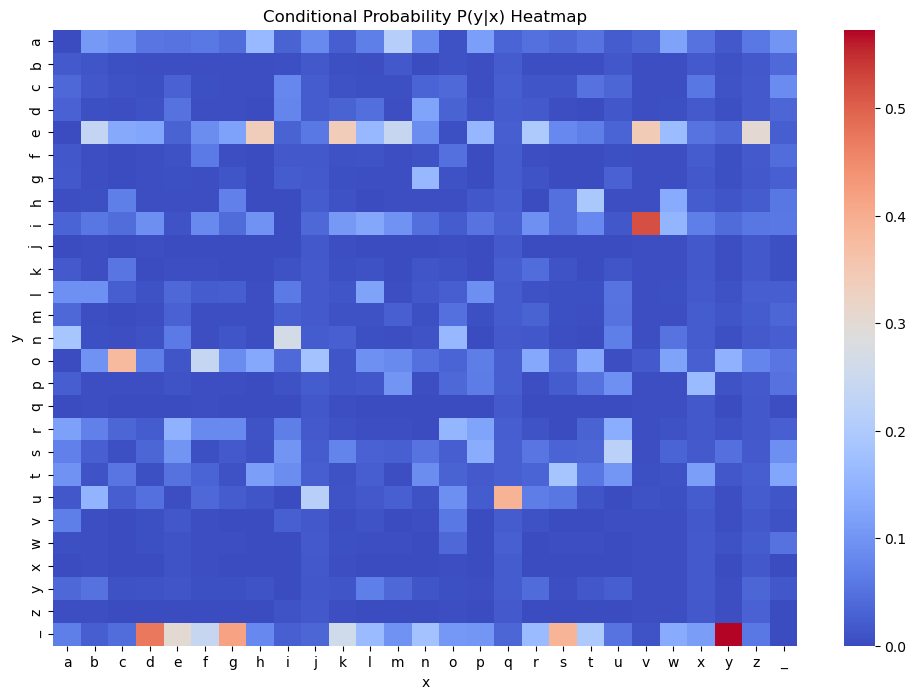

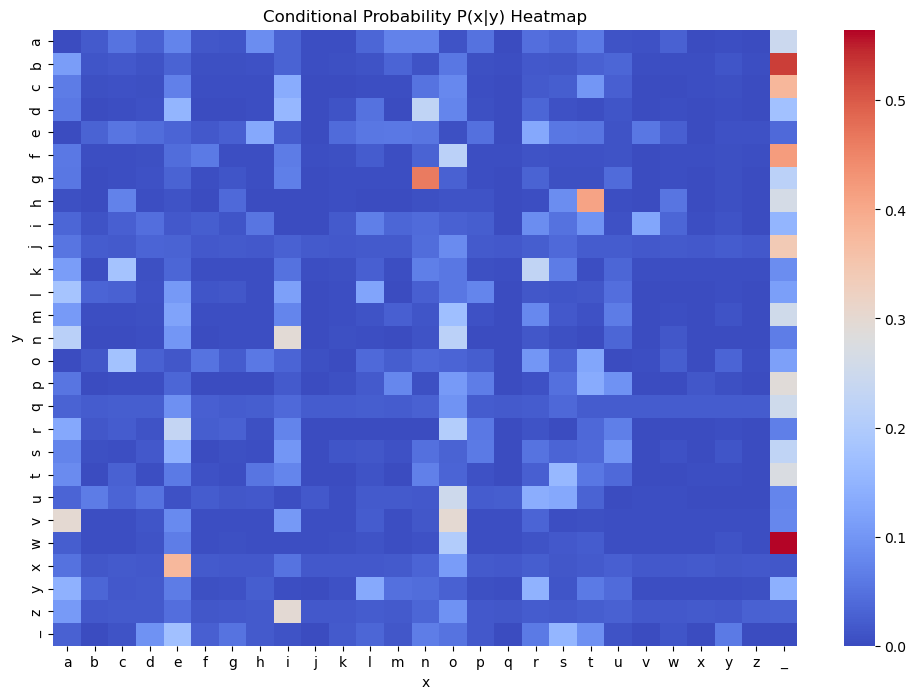

Highest P(x|y) for y=w: 0.5647493636319361
Lowest P(x|y) for y=_: 0
Highest P(y|x) for x=y: 0.5728950732466898
Lowest P(y|x) for x=_: 0


In [15]:
# Initialize dictionaries to store conditional probabilities P(y|x) and P(x|y)
conditional_prob_y_given_x = {x: {y: 0 for y in A} for x in A}
conditional_prob_x_given_y = {y: {x: 0 for x in A} for y in A}

# Calculate conditional probabilities P(y|x) and P(x|y)
for x in A:
    for y in A:
        if bigram_probabilities[(x, y)] > 0:
            conditional_prob_y_given_x[x][y] = bigram_probabilities[(x, y)] / character_probabilities[x]
            conditional_prob_x_given_y[y][x] = bigram_probabilities[(x, y)] / character_probabilities[y]
        else:
            conditional_prob_y_given_x[x][y] = 0
            conditional_prob_x_given_y[y][x] = 0  

# Create heatmap for P(y|x)
plt.figure(figsize=(12, 8))
sns.heatmap([[conditional_prob_y_given_x[x][y] for x in A] for y in A], xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conditional Probability P(y|x) Heatmap")

plt.show()

# Create heatmap for P(x|y)
plt.figure(figsize=(12, 8))
sns.heatmap([[conditional_prob_x_given_y[y][x] for x in A] for y in A], xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conditional Probability P(x|y) Heatmap")

plt.show()

# Find  highest and lowest probabilities in P(x|y) and P(y|x)
max_prob_x_given_y = max(conditional_prob_x_given_y, key=lambda x: max(conditional_prob_x_given_y[x].values()))
min_prob_x_given_y = min(conditional_prob_x_given_y, key=lambda x: min(conditional_prob_x_given_y[x].values()))
max_prob_y_given_x = max(conditional_prob_y_given_x, key=lambda x: max(conditional_prob_y_given_x[x].values()))
min_prob_y_given_x = min(conditional_prob_y_given_x, key=lambda x: min(conditional_prob_y_given_x[x].values()))

print(f"Highest P(x|y) for y={max_prob_x_given_y}: {max(conditional_prob_x_given_y[max_prob_x_given_y].values())}")
print(f"Lowest P(x|y) for y={min_prob_x_given_y}: {min(conditional_prob_x_given_y[min_prob_x_given_y].values())}")
print(f"Highest P(y|x) for x={max_prob_y_given_x}: {max(conditional_prob_y_given_x[max_prob_y_given_x].values())}")
print(f"Lowest P(y|x) for x={min_prob_y_given_x}: {min(conditional_prob_y_given_x[min_prob_y_given_x].values())}")

For P(x|y), the highest probability is reached if y = w and for x = _.

For P(y|x), the highest probability is reached if x = y and for y = _.

For P(x|y) and P(y|x), the lowest probability is reched if x = y = _. This can be expected, because the frequncy of ('_', '_') is zero.

Every highest probabilities are harder to explain. It can be expected, that the character '_' is included in the pair, because it is the most frequent character overall reached, w

In [16]:
# Check if conditional probabilities are the same
conditional_prob_y_given_x == conditional_prob_x_given_y

False

The conditional probabilities are not identical! If they were identical, the probability would be independet of the order of the pairs.

Generally, we can obsever